In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3

# import copy
# import numpy as np
# import xgboost as xgb
# import seaborn as sns
# from datetime import datetime
# Set up for visualizations
# %matplotlib inline
# sns.set(style="whitegrid")


In [5]:
# Load data
dataset = "dataset_2012-24"
con = sqlite3.connect("../../Data/dataset.sqlite")
data = pd.read_sql_query(f"select * from \"{dataset}\"", con, index_col="index")
con.close()

# margin = data['Home-Team-Win']
# data.drop(['Score', 'Home-Team-Win', 'TEAM_NAME', 'Date', 'TEAM_NAME.1', 'Date.1', 'OU-Cover', 'OU'],
#           axis=1, inplace=True)

# Prepare your data for visualization (adapt according to your data structure)
# This might include creating DataFrames from your predictions, odds, and other outputs
# Example:
# data_for_visualization = pd.DataFrame(your_data_array)


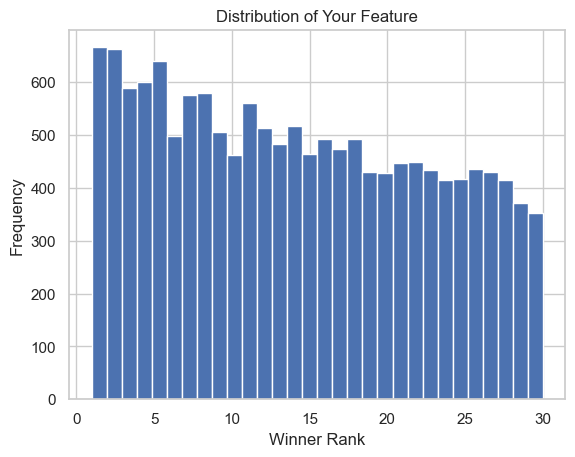

In [9]:
# Histogram of a single feature

data['W_RANK'].hist(bins=30)
plt.xlabel('Winner Rank')
plt.ylabel('Frequency')
plt.title('Distribution of Your Feature')
plt.show()

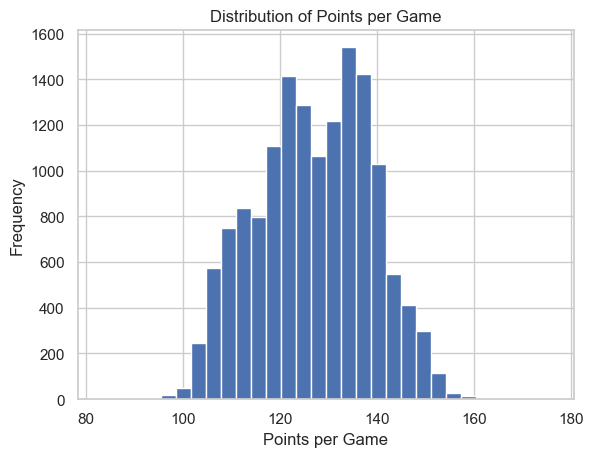

In [10]:
data['PPG'] = data['FGM'] * 2 + data['FG3M'] * 3 + data['FTM']  # Assuming 2 points for FGM and 3 for FG3M
data['PPG'].hist(bins=30)
plt.xlabel('Points per Game')
plt.ylabel('Frequency')
plt.title('Distribution of Points per Game')
plt.show()


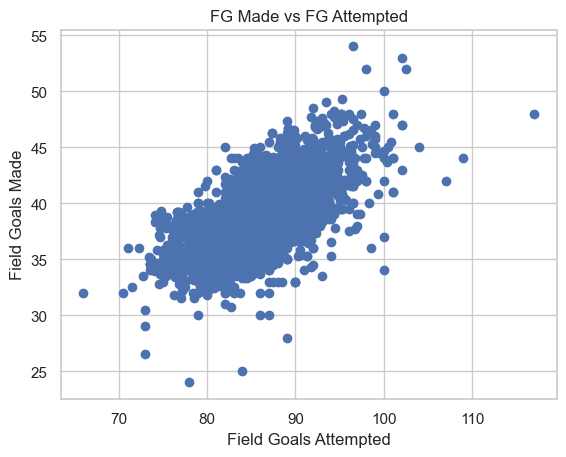

In [11]:
plt.scatter(data['FGA'], data['FGM'])
plt.xlabel('Field Goals Attempted')
plt.ylabel('Field Goals Made')
plt.title('FG Made vs FG Attempted')
plt.show()


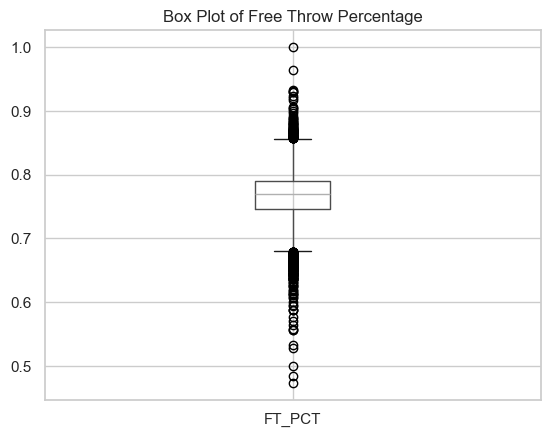

In [12]:
data.boxplot(column=['FT_PCT'])
plt.title('Box Plot of Free Throw Percentage')
plt.show()


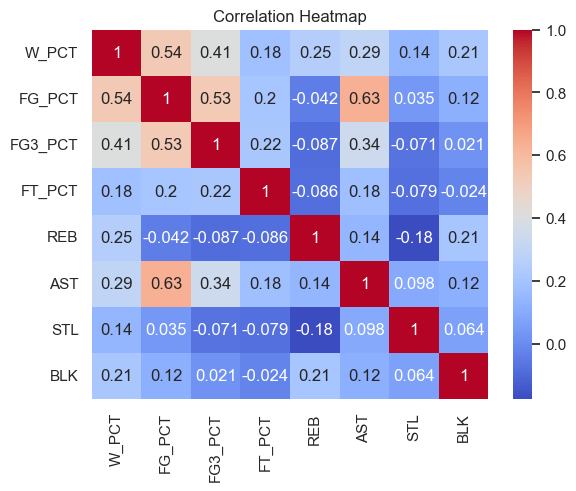

In [13]:
import seaborn as sns

# Selecting a few columns for simplicity
selected_columns = ['W_PCT', 'FG_PCT', 'FG3_PCT', 'FT_PCT', 'REB', 'AST', 'STL', 'BLK']
corr_matrix = data[selected_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


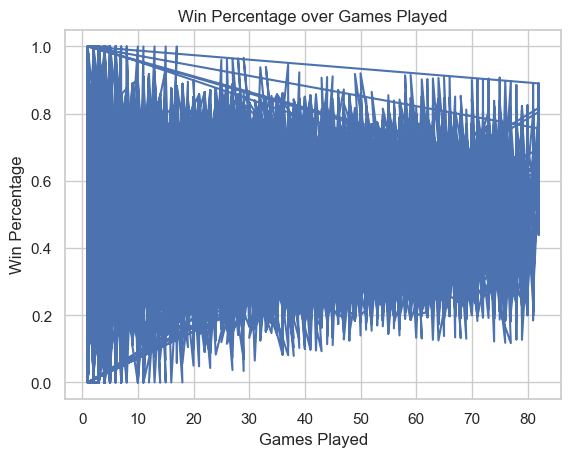

In [14]:
plt.plot(data['GP'], data['W_PCT'])
plt.xlabel('Games Played')
plt.ylabel('Win Percentage')
plt.title('Win Percentage over Games Played')
plt.show()


In [15]:
import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect("../../Data/dataset.sqlite")

# Execute the PRAGMA command to get table information
cursor = conn.execute("PRAGMA table_info('dataset_2012-24')")
columns = cursor.fetchall()

# Close the connection
conn.close()

# columns will be a list of tuples with the column information
for col in columns:
    print(col)


(0, 'index', 'INTEGER', 0, None, 0)
(1, 'TEAM_NAME', 'TEXT', 0, None, 0)
(2, 'GP', 'REAL', 0, None, 0)
(3, 'W', 'REAL', 0, None, 0)
(4, 'L', 'REAL', 0, None, 0)
(5, 'W_PCT', 'REAL', 0, None, 0)
(6, 'MIN', 'REAL', 0, None, 0)
(7, 'FGM', 'REAL', 0, None, 0)
(8, 'FGA', 'REAL', 0, None, 0)
(9, 'FG_PCT', 'REAL', 0, None, 0)
(10, 'FG3M', 'REAL', 0, None, 0)
(11, 'FG3A', 'REAL', 0, None, 0)
(12, 'FG3_PCT', 'REAL', 0, None, 0)
(13, 'FTM', 'REAL', 0, None, 0)
(14, 'FTA', 'REAL', 0, None, 0)
(15, 'FT_PCT', 'REAL', 0, None, 0)
(16, 'OREB', 'REAL', 0, None, 0)
(17, 'DREB', 'REAL', 0, None, 0)
(18, 'REB', 'REAL', 0, None, 0)
(19, 'AST', 'REAL', 0, None, 0)
(20, 'TOV', 'REAL', 0, None, 0)
(21, 'STL', 'REAL', 0, None, 0)
(22, 'BLK', 'REAL', 0, None, 0)
(23, 'BLKA', 'REAL', 0, None, 0)
(24, 'PF', 'REAL', 0, None, 0)
(25, 'PFD', 'REAL', 0, None, 0)
(26, 'PTS', 'REAL', 0, None, 0)
(27, 'PLUS_MINUS', 'REAL', 0, None, 0)
(28, 'GP_RANK', 'REAL', 0, None, 0)
(29, 'W_RANK', 'REAL', 0, None, 0)
(30, 'L_RANK',

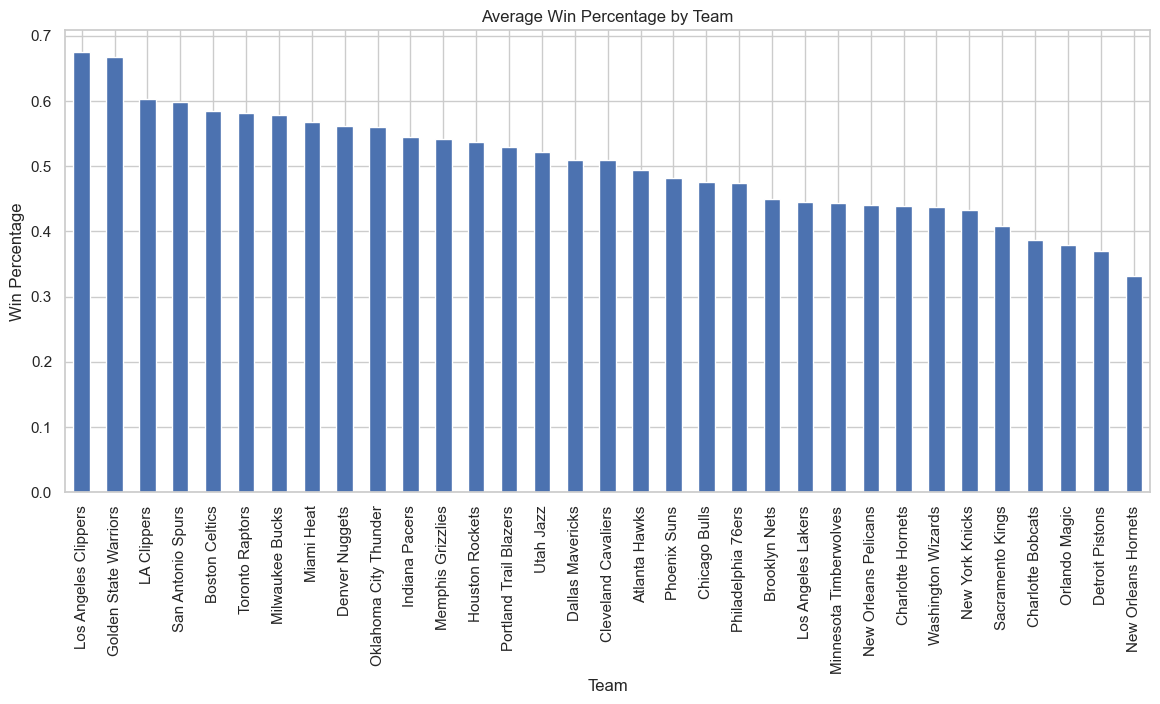

In [16]:
# Visualize which teams have the highest win percentages.
teams_win_pct = data.groupby('TEAM_NAME')['W_PCT'].mean().sort_values(ascending=False)
teams_win_pct.plot(kind='bar', figsize=(14,6))
plt.title('Average Win Percentage by Team')
plt.ylabel('Win Percentage')
plt.xlabel('Team')
plt.show()


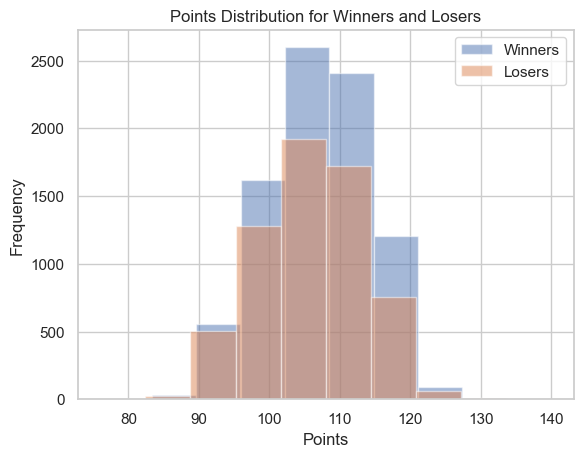

In [17]:
# Compare the distribution of points for winning and losing teams.
plt.hist(data[data['Home-Team-Win'] == 1]['PTS'], alpha=0.5, label='Winners')
plt.hist(data[data['Home-Team-Win'] == 0]['PTS'], alpha=0.5, label='Losers')
plt.title('Points Distribution for Winners and Losers')
plt.xlabel('Points')
plt.ylabel('Frequency')
plt.legend()
plt.show()


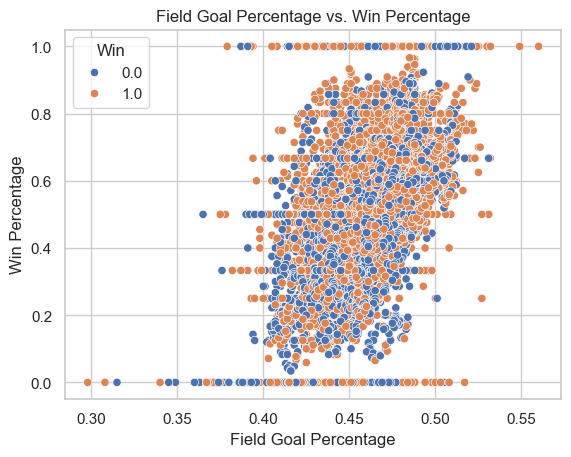

In [18]:
# Field Goal Percentage Impact on Winning
# Investigate how the field goal percentage correlates with winning matches.
sns.scatterplot(x='FG_PCT', y='W_PCT', data=data, hue='Home-Team-Win')
plt.title('Field Goal Percentage vs. Win Percentage')
plt.xlabel('Field Goal Percentage')
plt.ylabel('Win Percentage')
plt.legend(title='Win')
plt.show()


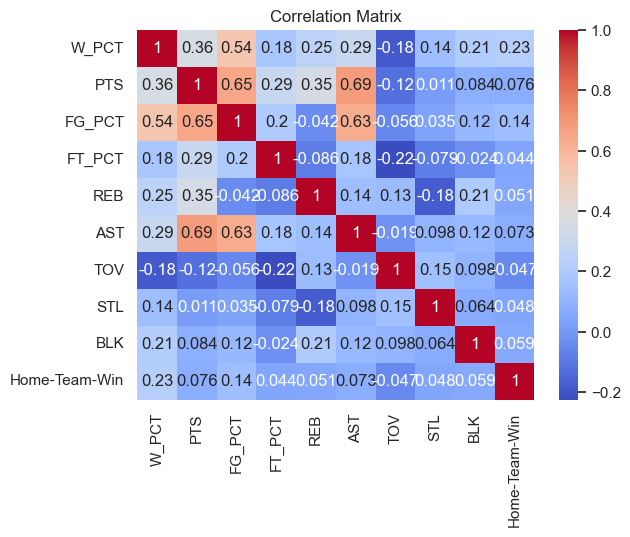

In [19]:
# A correlation heatmap can show how different features are related to the likelihood of winning.
# Select columns that are likely to influence the outcome
features = ['W_PCT', 'PTS', 'FG_PCT', 'FT_PCT', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'Home-Team-Win']
correlation = data[features].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


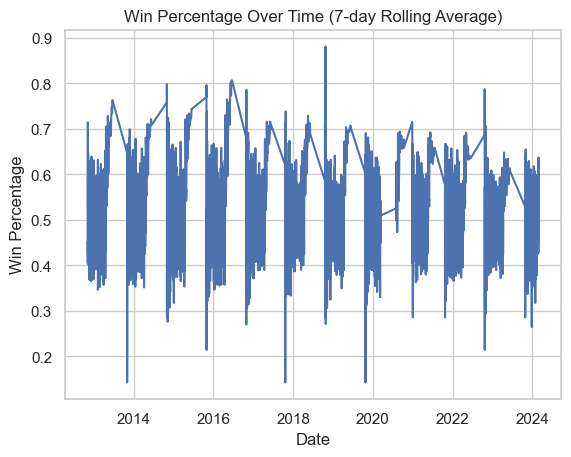

In [20]:
# Track performance metrics over time to see if there are trends that could influence predictions.
# This assumes you have a 'Date' column with datetime objects
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values('Date', inplace=True)
plt.plot(data['Date'], data['W_PCT'].rolling(window=7).mean()) # 7-day rolling average
plt.title('Win Percentage Over Time (7-day Rolling Average)')
plt.xlabel('Date')
plt.ylabel('Win Percentage')
plt.show()


Accuracy: 66.4: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [01:02<00:00,  4.14s/it]


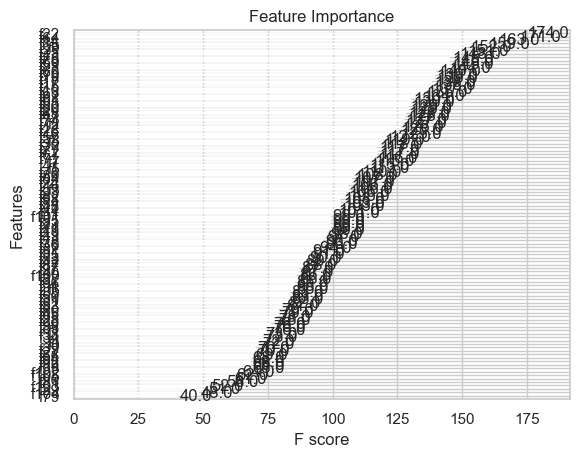

In [23]:
# Visualize the feature importance from your XGBoost model.
# After fitting your model, you can plot feature importance

import sqlite3

import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from tqdm import tqdm

import warnings
# Filter out FutureWarnings from xgboost
warnings.filterwarnings("ignore", category=FutureWarning, module='xgboost.*')

dataset = "dataset_2012-24"
con = sqlite3.connect("../../Data/dataset.sqlite")
data = pd.read_sql_query(f"select * from \"{dataset}\"", con, index_col="index")
con.close()

margin = data['Home-Team-Win']
data.drop(['Score', 'Home-Team-Win', 'TEAM_NAME', 'Date', 'TEAM_NAME.1', 'Date.1', 'OU-Cover', 'OU'],
          axis=1, inplace=True)

data = data.values

data = data.astype(float)
acc_results = []


with tqdm(total=15) as progress_bar:
    for x in range(15):
        x_train, x_test, y_train, y_test = train_test_split(data, margin, test_size=.1)

        train = xgb.DMatrix(x_train, label=y_train)
        test = xgb.DMatrix(x_test, label=y_test)

        param = {
            "max_depth": 3,
            "learning_rate": 0.1,
            # "n_estimators": 200,
            "subsample": 0.6,
            "colsample_bytree": 0.6,
            "min_child_weight": 4,

            'eta': 0.01,
            # 'n_estimators': 300,
            'num_class': 2,
            'objective': 'multi:softprob',

        }
        epochs = 800

        model = xgb.train(param, train, epochs)
        predictions = model.predict(test)
        y = []

        for z in predictions:
            y.append(np.argmax(z))

        acc = round(accuracy_score(y_test, y) * 100, 1)
        # print(f"{acc}%")
        acc_results.append(acc)
        # only save results if they are the best so far
        best_acc = max(acc_results)
        if acc == best_acc:
            best_model = model
            model.save_model('../../Models/XGBoost_{}%_ML-4.json'.format(acc))

        progress_bar.set_description(f"Accuracy: {best_acc}")
        progress_bar.update(1)



xgb.plot_importance(best_model)
plt.title('Feature Importance')
plt.show()



